# Tuango - RFM Analysis for Mobile App Push Messaging

Prepare "Tuango: RFM Analysis for Mobile App Push Messaging" for class discussion and as an individual assignment and submit the assignment through GitLab. Detailed instructions are available in the tuango.pdf the document file in the assignment repo that will be forked to your GitLab projects page:

https://rsm-gitlab.ucsd.edu/dashboard/projects

The assignment is also available on Canvas. Please generate an HTML document with your answers to all the questions listed in the tuango.pdf file. When you have finished editing the Jupyter notebook and have generated the HTML report, make sure to save, commit, and push it to GitLab. Of course you can commit and push code as often as you like, but only before the due date. View the video linked below to refresh your memory on how to clone and push git repos with python code.

[Using Git with Python Code](https://youtu.be/6mWc-FhQW5g)

Add text motivating your work in Markdown format. Markdown is a simple formatting syntax for authoring HTML. For more details on using markdown go to http://commonmark.org/help/ for a 10-minute interactive Markdown tutorial

We will collect your assignment from GitLab after the due date. Note that your python code must be fully "reproducible". That is, your Jupyter notebook must run without errors on my (or the TAs) computer and on the MSBA server. There is nothing that you need to submit to Canvas.

This is an individual assignment. As a reminder, it is an honor code violation to share any assignment or exam solution from this class with another student in a current class or a future class generation. It is also an honor code violation to obtain assignments or exams from a student in another current class or a past class generation for use as an aid in solving problems to be turned in and  graded. Please respect the honor code as it helps to maintain parity in the classroom.

Note: GitLab will automatically tests if your work is fully reproducible each time to "push" changes (see .gitlab-ci.yml for the configuration). If you get an email from GitLab stating that there was an error, it suggests a problem in your code. Note that the setup for this assignment will *not* test if your analysis is correct. Only if the code is valid and runs without issue in the docker container.

## Setup

Please complete this python notebook by answering the questions 1-14 in `tuango.pdf`.  The code blocks below will load a few python modules you will need and also the data you will need for this first notebook. 

Hint: Make sure to use the `xtile` function from the pyrsm package to create all RFM "bins"

In [142]:
import numpy as np
import pandas as pd
import pyrsm as rsm
import seaborn as sns

# you can import additional python packages but only use packages that
# are already part of the docker container

In [143]:
## Use this dataset and notebook to answer questions 1-13
tuango = pd.read_pickle("data/tuango_pre.pkl")
tuango

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,training
0,U12617430,309,7,39.80,514,no,0.0,App,3,android,1
1,U63302737,297,8,39.80,514,no,0.0,Browser,3,android,1
2,U77095928,295,1,72.90,553,no,0.0,Browser,3,android,1
3,U43509181,277,1,40.00,554,no,0.0,Browser,3,android,1
4,U23195941,259,1,21.00,555,no,0.0,App,3,android,1
...,...,...,...,...,...,...,...,...,...,...,...
278775,U14081166,329,12,8.16,515,NaN,NaN,App,9,android,0
278776,U44222234,14,4,314.67,231,NaN,NaN,App,9,android,0
278777,U27441294,58,7,22.57,415,NaN,NaN,App,9,android,0
278778,U50898226,20,5,33.00,324,NaN,NaN,App,9,android,0


## Part I:  Preliminary and Quintile Analysis (Q1 to Q6, 3 points each)

### 1. What percentage of customers responded (i.e., bought anything) after the push message?

In [144]:
# insert calculation code here
# the result should be expressed as a percentage as a string with 2 decimal 
# places and assigned to q1 (e.g., q1 = '5.43%')

newDF = tuango[tuango['training']==1]   #10%data
q1 = str(round(pd.Series(np.where(newDF.buyer.values == 'yes', 1, 0), newDF.index).mean()*100, 2)) + '%'
q1

'2.98%'


### 2. What was the average amount spent on the Karaoke deal by customers that bought one (or more)? Use the `ordersize` variable for your calculation

In [145]:
# insert calculation code here to create a pd.pivot_table that shows
# (1) counts the number of yes and no, (2) the mean ordersize, and 
# (3) the standard deviation in ordersize for yes and no responses
q2 =  pd.pivot_table(newDF, values='ordersize', index=['buyer'], aggfunc=[np.mean, np.std])

# the below should show your result
q2.loc["yes", "mean"]

ordersize    202.128761
Name: yes, dtype: float64

In [146]:
q2

,mean,std
,ordersize,ordersize
buyer,,
yes,202.128761,40.48003
no,0.000000,0.00000


### 3.	Create independent quintile variables for recency, frequency and monetary

In [147]:
# insert calculation code to add columns `rec_iq`, `freq_iq`, and `mon_iq`
# to the `tuango` DataFrame
# Hint: You can also use the 'assign' method for DataFrames to add multiple
# varialbes in one step

tuango["rec_iq"] = pd.qcut(tuango['recency'], 5, labels=np.arange(1, 6, 1))
tuango["freq_iq"] = rsm.xtile(tuango["frequency"], rev=True)
tuango["mon_iq"] = rsm.xtile(tuango["monetary"], rev=True)  # pd.qcut(tuango['monetary'], 5, labels=np.arange(5, 0, -1))
tuango["freq_iq"].astype('category')

0         1
1         1
2         5
3         5
4         5
         ..
278775    1
278776    3
278777    1
278778    2
278779    5
Name: freq_iq, Length: 278780, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

In [148]:
tuango.tail()

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,training,rec_iq,freq_iq,mon_iq
278775,U14081166,329,12,8.16,515,NaN,NaN,App,9,android,0,5,1,5
278776,U44222234,14,4,314.67,231,NaN,NaN,App,9,android,0,2,3,1
278777,U27441294,58,7,22.57,415,NaN,NaN,App,9,android,0,4,1,5
278778,U50898226,20,5,33.00,324,NaN,NaN,App,9,android,0,3,2,4
278779,U84790963,45,1,6.80,455,NaN,NaN,App,9,android,0,4,5,5


### 4.	Create bar charts showing the response rate (i.e., the proportion of customers who bought something) for this deal per (independent) recency, frequency, and monetary quintile (i.e., 3 plots)

> Note: Ensure the 1st quantile contains the best customers for each variable you create

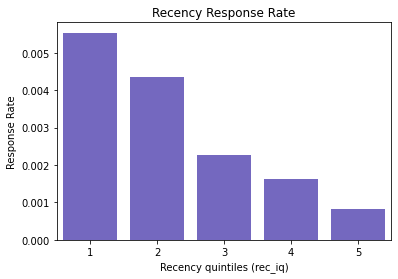

In [149]:
# insert code here

#recency
fig_1 = rsm.prop_plot(tuango, "rec_iq", "buyer", "yes")
fig_1 = fig_1.set(xlabel="Recency quintiles (rec_iq)", ylabel="Response Rate", title='Recency Response Rate')

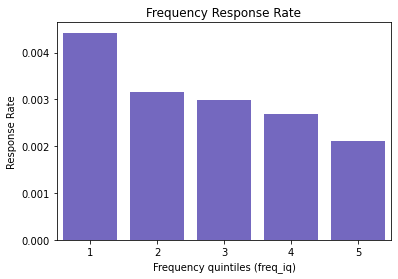

In [150]:
#frequency
fig_2 = rsm.prop_plot(tuango, "freq_iq", "buyer", "yes")
fig_2 = fig_2.set(xlabel="Frequency quintiles (freq_iq)", ylabel="Response Rate", title='Frequency Response Rate')

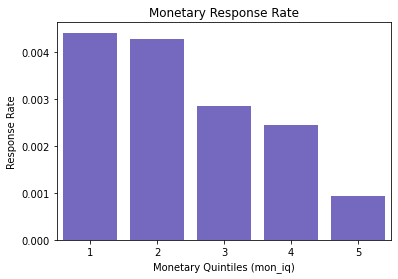

In [151]:
#monetary
fig_3 = rsm.prop_plot(tuango, "mon_iq", "buyer", "yes")
fig_3 = fig_3.set(xlabel="Monetary Quintiles (mon_iq)", ylabel="Response Rate", title='Monetary Response Rate')

### 5.	Create bar charts showing the average amount spent (in RMB) (i.e., ordersize) per independent recency, frequency, and monetary quintile using only those customers who placed an order after the push message (i.e., 3 plots)



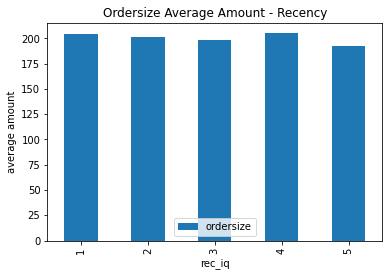

In [152]:
# insert code here

#since only the first 10% data includes ordersize information, I created a new dataframe which only contains the first 10% data
newDF = tuango.iloc[:int(len(tuango)*0.1)]   #10%data
fig_1 = newDF[newDF['buyer'] == 'yes'].groupby(['rec_iq'])['ordersize'].mean().plot(kind='bar', legend=True, 
                                                                                    title='Ordersize Average Amount - Recency',
                                                                                   ylabel='average amount')


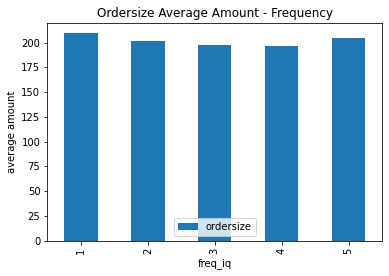

In [153]:
fig_2 = newDF[newDF['buyer'] == 'yes'].groupby(['freq_iq'])['ordersize'].mean().plot(kind='bar', legend=True, 
                                                                                    title='Ordersize Average Amount - Frequency',
                                                                                   ylabel='average amount')


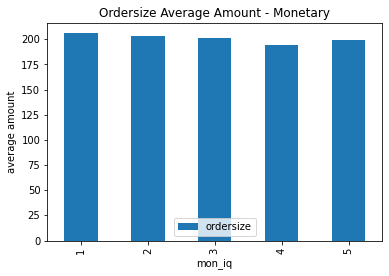

In [154]:
fig_3 = newDF[newDF['buyer'] == 'yes'].groupby(['mon_iq'])['ordersize'].mean().plot(kind='bar', legend=True, 
                                                                                    title='Ordersize Average Amount - Monetary',
                                                                                   ylabel='average amount')


### 6.	What do the above bar charts reveal about the likelihood of response and the size of the order across the different recency, frequency, and monetary quintiles?

... enter your response here ...


The response rate in Recency, Frequency, Monetary plots have similar results: Group 1 has the highest response rate, and group 5 has the lowest. 

However, for ordersize plots, each group has similar ordersize in Recency, Frequency, Monetary plots.


## Part II: Profitability Analysis (Q7, 2 points; Q8 to Q13, 6 points each, Q14, 10 points)


### 7. What is the breakeven response rate?

In [155]:
# state your assumptions relevant to calculate the breakeven response rate
# breakeven should be of type `float`

# cost to email / margin or sale

cost = 2.5 # float, length 1
margin = q2.loc["yes", "mean"][0]*0.5 # float, length 1
breakeven =  cost / margin # float, length 1
q7 = breakeven
q7

0.02473670736862159

### 8. What is the projected profit in RMB and the return on marketing expenditures if you offer the deal to all 250,902 remaining customers?

In [156]:
# insert calculation code here
# all variables should be numeric (integer or float) and of length 1
# _nt stands for 'no targeting'

nr_sms_nt = len(tuango[tuango['training']==0])  # total number of SMSs that would be sent out
sms_cost_nt = 2.5 # cost of sending an sms (float)
nr_responses_nt = pd.Series(np.where(newDF.buyer.values == 'yes', 1, 0), newDF.index).mean()*nr_sms_nt   # total number of positive responses
response_rate_nt = pd.Series(np.where(newDF.buyer.values == 'yes', 1, 0), newDF.index).mean() # expressed as a proportion (no rounding)
revenue_nt = nr_responses_nt*margin # total revenue in RMB (no rounding)
profit_nt = nr_responses_nt*margin -  cost*nr_sms_nt    # total profit in RMB (no rounding)
ROME_nt = profit_nt / (sms_cost_nt*nr_sms_nt)  # Return on Marketing Expenditures expressed as a proportion (no rounding)



print('nr_sms_nt: ', nr_sms_nt)
print('sms_cost_nt: ', sms_cost_nt)
print('nr_responses_nt: ', nr_responses_nt)
print('response_rate_nt: ', response_rate_nt)
print('revenue_nt: ', revenue_nt)
print('profit_nt: ', profit_nt)
print('ROME_nt: ', ROME_nt)



nr_sms_nt:  250902
sms_cost_nt:  2.5
nr_responses_nt:  7479.0
response_rate_nt:  0.02980845110840089
revenue_nt:  755860.5
profit_nt:  128605.5
ROME_nt:  0.20502905516895042


### 9. Evaluate the performance implications of offering the deal to only those customers (out of 250,902) in RFM cells with a response rate greater than the breakeven response rate

Generate your result based on both sequential and independent RFM. Determine the projected profit in RMB and the return on marketing expenditures for each approach

In [157]:
# add `rfm_iq` to the tuango dataset
tuango["rfm_iq"] = tuango["rec_iq"].astype(str) + tuango["freq_iq"].astype(str) +  tuango["mon_iq"].astype(str)
# tuango.head()

In [158]:
def response_rate(x, lev="yes"):
    return np.nanmean(x == lev)
def mailto(x, lev="yes", breakeven=0):
    return np.nanmean(x == "yes") > breakeven
breakeven = q7
breakeven

0.02473670736862159

In [159]:
# determine which customers to sms based on independent quintiles RFM

#calculate the response rate for the first 10% people, and apply the response rate tp the rest 
newDF = tuango[tuango['training']==1]
newDF['rfm_iq_resp_10'] = newDF.groupby("rfm_iq").buyer.transform(response_rate)
newDF_2 = newDF[['rfm_iq', 'rfm_iq_resp_10']]
newDF_dict = pd.Series(newDF_2.rfm_iq_resp_10.values,index=newDF_2.rfm_iq).to_dict()

tuango['rfm_iq_resp'] =  tuango['rfm_iq'].map(newDF_dict)    #not required
tuango["smsto_iq"] = np.where(tuango['rfm_iq_resp']>=breakeven, True, False)

<ipython-input-159-8762655ceddd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF['rfm_iq_resp_10'] = newDF.groupby("rfm_iq").buyer.transform(response_rate)


In [160]:
tuango.tail()

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,training,rec_iq,freq_iq,mon_iq,rfm_iq,rfm_iq_resp,smsto_iq
278775,U14081166,329,12,8.16,515,NaN,NaN,App,9,android,0,5,1,5,515,0.010870,False
278776,U44222234,14,4,314.67,231,NaN,NaN,App,9,android,0,2,3,1,231,0.084337,True
278777,U27441294,58,7,22.57,415,NaN,NaN,App,9,android,0,4,1,5,415,0.008403,False
278778,U50898226,20,5,33.00,324,NaN,NaN,App,9,android,0,3,2,4,324,0.037037,True
278779,U84790963,45,1,6.80,455,NaN,NaN,App,9,android,0,4,5,5,455,0.000000,False


In [161]:
# insert calculation code to add columns `freq_sq`, and `mon_sq`
# to the `tuango` DataFrame
# Note that pandas `assign` method doesn't allow you to use variables created in the same call to assign

tuango["freq_sq"] = tuango.groupby("rec_iq").frequency.transform(rsm.xtile, 5, rev=True)
tuango["mon_sq"] = tuango.groupby(["rec_iq", "freq_sq"]).monetary.transform(rsm.xtile, 5, rev=True)

In [162]:
# add `rfm_sq` to the tuango dataset
tuango["rfm_sq"] = tuango.rec_iq.astype(str) + tuango.freq_sq.astype(str) + tuango.mon_sq.astype(str)

In [163]:
tuango.head()

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,training,rec_iq,freq_iq,mon_iq,rfm_iq,rfm_iq_resp,smsto_iq,freq_sq,mon_sq,rfm_sq
0,U12617430,309,7,39.8,514,no,0.0,App,3,android,1,5,1,4,514,0.036145,True,1,4,514
1,U63302737,297,8,39.8,514,no,0.0,Browser,3,android,1,5,1,4,514,0.036145,True,1,4,514
2,U77095928,295,1,72.9,553,no,0.0,Browser,3,android,1,5,5,3,553,0.009231,False,5,3,553
3,U43509181,277,1,40.0,554,no,0.0,Browser,3,android,1,5,5,4,554,0.000000,False,5,4,554
4,U23195941,259,1,21.0,555,no,0.0,App,3,android,1,5,5,5,555,0.003802,False,5,5,555


In [164]:
# determine which customers to sms based on sequential quintiles RFM


#calculate the response rate for the first 10% people, and apply the response rate tp the rest
newDF = tuango[tuango['training']==1]
newDF['rfm_sq_resp_10'] = newDF.groupby("rfm_sq").buyer.transform(response_rate)
newDF_3 = newDF[['rfm_sq', 'rfm_sq_resp_10']]
newDF_dict_3 = pd.Series(newDF_3.rfm_sq_resp_10.values,index=newDF_3.rfm_sq).to_dict()


tuango['rfm_sq_resp'] = tuango['rfm_sq'].map(newDF_dict_3)    #not required
tuango["smsto_sq"] = np.where(tuango['rfm_sq_resp']>=breakeven, True, False)


<ipython-input-164-0bbb1011e197>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF['rfm_sq_resp_10'] = newDF.groupby("rfm_sq").buyer.transform(response_rate)


In [165]:
tuango.tail()

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,...,freq_iq,mon_iq,rfm_iq,rfm_iq_resp,smsto_iq,freq_sq,mon_sq,rfm_sq,rfm_sq_resp,smsto_sq
278775,U14081166,329,12,8.16,515,NaN,NaN,App,9,android,...,1,5,515,0.010870,False,1,5,515,0.014778,False
278776,U44222234,14,4,314.67,231,NaN,NaN,App,9,android,...,3,1,231,0.084337,True,3,1,231,0.090426,True
278777,U27441294,58,7,22.57,415,NaN,NaN,App,9,android,...,1,5,415,0.008403,False,1,4,414,0.000000,False
278778,U50898226,20,5,33.00,324,NaN,NaN,App,9,android,...,2,4,324,0.037037,True,2,4,324,0.040000,True
278779,U84790963,45,1,6.80,455,NaN,NaN,App,9,android,...,5,5,455,0.000000,False,5,5,455,0.000000,False


In [166]:
# write your perf_calc function here (see the tuango.pdf document for suggestions)
def perf_calc(dat=tuango, smsto=None, intro="", perf="buyer", lev="yes"):
    """
    Calculate projected performance implications from using different 
    targeting strategies

    Parameters
    ----------
    dat : Pandas DataFrame
        Pass the tuango dataset as the default value
    smsto : str
        A string with the name of the 'smsto' variable to use for calculations
    intro : str
        A string that provides an introduㄉㄉction to the printed output
    perf: str
        A string with the name of the performance variable to use ('buyer')
    lev: str
        A string with the name of the level in the perf variable that signifies success ('yes')

    Returns
    -------
    nr_sms : Total number of SMSs that would be sent out
    sms_cost : cost of sending an sms (float)
    nr_responses : Total number of positive responses
    response_rate : Expressed as a proportion (no rounding)
    revenue : Total revenue in RMB (no rounding)
    ROME : Return on Marketing Expenditures expressed as a proportion (no rounding)
    profit : Total profit in RMB (no rounding)
    """

    # insert your code
    dat_2 = dat[dat['training']==0]
    dat_1 = dat[dat['training']==1]
    
    # insert your code
    if smsto == None:
        nr_sms = len(dat_2)
        sms_cost = 2.5*nr_sms
        nr_responses = pd.Series(np.where(dat_1[perf].values == lev, 1, 0), dat_1.index).mean()*nr_sms
        response_rate = nr_responses / nr_sms
        revenue = nr_responses*margin
        profit = revenue - sms_cost
        ROME = profit / (sms_cost)
        
        
    else:
        nr_sms = len(dat_2[dat_2[smsto]==True])
        sms_cost = 2.5*nr_sms
        response_rate = len(dat_1[dat_1[smsto]==True][dat_1[perf]==lev]) / len(dat_1[dat_1[smsto]==True])
        nr_responses = response_rate*nr_sms
        revenue = nr_responses*margin
        profit = nr_responses*margin - sms_cost
        ROME = profit / (sms_cost)
    
    return nr_sms, sms_cost, nr_responses, response_rate, revenue, ROME, profit


In [167]:
# dat_test = tuango[tuango['training']==1]
# print(len(dat_test[dat_test['smsto_iq']==True]))
# len(dat_test[dat_test['smsto_iq']==True][dat_test['buyer']=='yes']) 
# dat_test[(dat_test['smsto_iq']==True) & (dat_test['buyer']=='yes')]
# # 672/12418

In [168]:
# re-calculate performance for the no-targeting approach - should give same results as above
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _nt stands for 'no targeting'
nr_sms_nt, sms_cost_nt, nr_responses_nt, response_rate_nt, revenue_nt, ROME_nt, profit_nt = perf_calc(intro="If Tuango does not apply targeting")

print('nr_sms_nt: ', nr_sms_nt)
print('sms_cost_nt: ', sms_cost_nt)
print('nr_responses_nt: ', nr_responses_nt)
print('response_rate_nt: ', response_rate_nt)
print('revenue_nt: ', revenue_nt)
print('ROME_nt: ', ROME_nt)
print('profit_nt: ', profit_nt)  



nr_sms_nt:  250902
sms_cost_nt:  627255.0
nr_responses_nt:  7479.0
response_rate_nt:  0.02980845110840089
revenue_nt:  755860.5
ROME_nt:  0.20502905516895042
profit_nt:  128605.5


In [169]:
# calculate performance for independent RFM
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _iq stands for 'independent quintiles'

nr_sms_iq, sms_cost_iq, nr_responses_iq, response_rate_iq, revenue_iq, ROME_iq, profit_iq = perf_calc(smsto='smsto_iq', intro="performance for independent RFM")
print('nr_sms_iq: ', nr_sms_iq)
print('sms_cost_iq: ', sms_cost_iq)
print('nr_responses_iq: ', nr_responses_iq)
print('response_rate_iq: ', response_rate_iq)
print('revenue_iq: ', revenue_iq)
print('ROME_iq: ', ROME_iq)
print('profit_iq: ', profit_iq) 



nr_sms_iq:  111656
sms_cost_iq:  279140.0
nr_responses_iq:  6042.263810597519
response_rate_iq:  0.05411499436302142
revenue_iq:  610657.6474141123
ROME_iq:  1.1876393473314908
profit_iq:  331517.64741411235


<ipython-input-166-b14da0b18766>:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  response_rate = len(dat_1[dat_1[smsto]==True][dat_1[perf]==lev]) / len(dat_1[dat_1[smsto]==True])


In [170]:
# calculate performance for sequential RFM
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _sq stands for 'sequential quintiles'

nr_sms_sq, sms_cost_sq, nr_responses_sq, response_rate_sq, revenue_sq, ROME_sq, profit_sq = perf_calc(
    dat=tuango,
    smsto='smsto_sq', intro="performance for sequential RFM")
print('nr_sms_sq: ', nr_sms_sq)
print('sms_cost_sq: ', sms_cost_sq)
print('nr_responses_sq: ', nr_responses_sq)
print('response_rate_sq: ', response_rate_sq)
print('revenue_sq: ', revenue_sq)
print('ROME_sq: ', ROME_sq)
print('profit_sq: ', profit_sq) 



nr_sms_sq:  101321
sms_cost_sq:  253302.5
nr_responses_sq:  5837.165575221239
response_rate_sq:  0.05761061946902655
revenue_sq:  589929.5213624166
ROME_sq:  1.3289526213220026
profit_sq:  336627.02136241656


<ipython-input-166-b14da0b18766>:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  response_rate = len(dat_1[dat_1[smsto]==True][dat_1[perf]==lev]) / len(dat_1[dat_1[smsto]==True])


### 10.	What do you notice when you compare the `rfm_iq` and `rfm_sq` variables? Do the two approaches generally yield the same RFM index for any given customer? What do you see as the pros and cons of the two approaches (from a statistical as well as logical perspective) and why?

In [171]:
# insert any calculation or plotting code here

print('difference between rfm_iq and rfm_sq : nr_sms (iq - sq):', nr_sms_iq - nr_sms_sq)
print('difference between rfm_iq and rfm_sq : sms_cost (iq - sq):',   sms_cost_iq - sms_cost_sq)
print('difference between rfm_iq and rfm_sq : nr_responses (iq - sq):', nr_responses_iq - nr_responses_sq)
print('difference between rfm_iq and rfm_sq : response rate (iq - sq):', response_rate_iq - response_rate_sq)
print('difference between rfm_iq and rfm_sq : revenue (iq - sq):',   revenue_iq - revenue_sq)
print('difference between rfm_iq and rfm_sq : ROME (iq - sq):',  ROME_iq - ROME_sq)
print('difference between rfm_iq and rfm_sq : profit (iq - sq):',  profit_iq - profit_sq)

print('same RFM index: ', (tuango[tuango['training']==0]['rfm_iq'] == tuango[tuango['training']==0]['rfm_sq']).sum())
print('total testing data: ', len(tuango[tuango['training']==0]), 'percentage: ', (tuango[tuango['training']==0]['rfm_iq'] == tuango[tuango['training']==0]['rfm_sq']).sum()/ len(tuango[tuango['training']==0]))


difference between rfm_iq and rfm_sq : nr_sms (iq - sq): 10335
difference between rfm_iq and rfm_sq : sms_cost (iq - sq): 25837.5
difference between rfm_iq and rfm_sq : nr_responses (iq - sq): 205.09823537628017
difference between rfm_iq and rfm_sq : response rate (iq - sq): -0.0034956251060051305
difference between rfm_iq and rfm_sq : revenue (iq - sq): 20728.126051695785
difference between rfm_iq and rfm_sq : ROME (iq - sq): -0.14131327399051186
difference between rfm_iq and rfm_sq : profit (iq - sq): -5109.373948304215
same RFM index:  158373
total testing data:  250902 percentage:  0.6312145778032857


... provide you answer here ...

In the  total 250902 testing data, there are 250902 customers which has the same RFM index, which is around 63%.

The number and cost of sms for rfm_iq is higher than rmf_sq
The number of response for rfm_iq is higher than rfm_sq, however, the response rate for rfm_sq is higher than rfm_iq.
The revenue for rfm_iq is higher than rfm_sq, however, the ROME and profit for rfm_sq is higher than rfm_iq.

This mean that even rfm_sq is a better choice for Tuango.

Pros for choosing rfm_sq:
1. Lower revenue, however higher ROME and higher profit, which will bring better effect to the company. 

Cons for choosing rfm_sq:
1. Lower response rate, which means that the company encounter some problem targeting their customers. 

### 11.	The answer to question 9 assumes a single breakeven response rate that applies across all cells. Redo your analysis for sequential RFM based on a breakeven response rate calculated for each RFM cell. What implications can you draw from the difference in predicted performance compared to question 9?

> Note: You only need to calculate smsto_pcsq for this approach. You can use your perf_calc function to determine the performance implications without any adjustments

<!-- > Note: To project the expected profits for the remaining customers not part of the sample you can use Tuango’s standard fee and the ordersize number you calculated for question 2. -->

In [172]:
# calculate the average ordersize per sq code
newDF = tuango.iloc[:int(len(tuango)*0.1)] 
match_df = newDF[newDF['buyer']=='yes'].groupby(['rfm_sq'])["ordersize"].mean().to_frame().reset_index()
match_dict = pd.Series(match_df.ordersize.values, index=match_df.rfm_sq).to_dict()

tuango["avg_ordersize_sq"] = tuango['rfm_sq'].map(match_dict) 

# calculate a breakeven value per sq code

tuango["breakeven_pc"] =  cost / (tuango["avg_ordersize_sq"]*0.5)
tuango = tuango.replace([np.inf, -np.inf], 0)  


# calculate the smsto variable based on breakeven value per sq code
# _pcsq stands for 'per cell sequential quintiles'

tuango["smsto_pcsq"] = np.where(tuango['rfm_sq_resp']>=tuango["breakeven_pc"], True, False)

tuango.tail()



,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,...,rfm_iq_resp,smsto_iq,freq_sq,mon_sq,rfm_sq,rfm_sq_resp,smsto_sq,avg_ordersize_sq,breakeven_pc,smsto_pcsq
278775,U14081166,329,12,8.16,515,NaN,NaN,App,9,android,...,0.010870,False,1,5,515,0.014778,False,182.333333,0.027422,False
278776,U44222234,14,4,314.67,231,NaN,NaN,App,9,android,...,0.084337,True,3,1,231,0.090426,True,176.058824,0.028400,True
278777,U27441294,58,7,22.57,415,NaN,NaN,App,9,android,...,0.008403,False,1,4,414,0.000000,False,NaN,NaN,False
278778,U50898226,20,5,33.00,324,NaN,NaN,App,9,android,...,0.037037,True,2,4,324,0.040000,True,189.000000,0.026455,True
278779,U84790963,45,1,6.80,455,NaN,NaN,App,9,android,...,0.000000,False,5,5,455,0.000000,False,NaN,NaN,False


In [173]:
# len(tuango[tuango['smsto_pcsq']==True])

In [174]:
# tuango[tuango['smsto_iq']==False].count()

In [175]:
# calculate performance for break-even-per-cell sequential RFM
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _pcsq stands for 'per cell sequential quintiles'

nr_sms_pcsq, sms_cost_pcsq, nr_responses_pcsq, response_rate_pcsq, revenue_pcsq, ROME_pcsq, profit_pcsq = perf_calc(
dat=tuango, smsto="smsto_pcsq", intro="Based on sequential RFM with breakeven per cell"
)


print('nr_sms_pcsq: ', nr_sms_pcsq)
print('sms_cost_pcsq: ', sms_cost_pcsq)
print('nr_responses_pcsq: ', nr_responses_pcsq)
print('response_rate_pcsq: ', response_rate_pcsq)
print('revenue_pcsq: ', revenue_pcsq)
print('ROME_pcsq: ', ROME_pcsq)
print('profit_pcsq: ', profit_pcsq)  

nr_sms_pcsq:  110617
sms_cost_pcsq:  276542.5
nr_responses_pcsq:  6052.729815175097
response_rate_pcsq:  0.054717898832684825
revenue_pcsq:  611715.3876805932
ROME_pcsq:  1.2120122139656406
profit_pcsq:  335172.8876805932


<ipython-input-166-b14da0b18766>:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  response_rate = len(dat_1[dat_1[smsto]==True][dat_1[perf]==lev]) / len(dat_1[dat_1[smsto]==True])


### 12.	The answer to question 9 does not account for the fact that the response rate for each cell is an estimated quantity (i.e., it has a standard error). Redo your analysis for both independent RFM, adjusting for the standard error of the response rate in each cell

In [176]:
newDF['buyer_yes'] = np.where(newDF.buyer.values == 'yes', 1, 0)

newDF_lbsq = (
    newDF.groupby("rfm_sq").buyer_yes
    .agg(n_obs="count", prop=np.mean, se=rsm.seprop)
    .reset_index())
newDF_lbsq = newDF_lbsq.assign(prop_lb_sq=newDF_lbsq.prop - 1.64 * newDF_lbsq.se)[['rfm_sq', 'prop_lb_sq']]
match_dict_lbsq = pd.Series(newDF_lbsq.prop_lb_sq.values, index=newDF_lbsq.rfm_sq).to_dict()
tuango["rfm_lbsq_prob"] = tuango['rfm_sq'].map(match_dict_lbsq) 


tuango["smsto_lbsq"] = np.where(tuango['rfm_lbsq_prob']>=breakeven, True, False)

<ipython-input-176-81180ac39611>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDF['buyer_yes'] = np.where(newDF.buyer.values == 'yes', 1, 0)


In [177]:
tuango.head(10)

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,...,freq_sq,mon_sq,rfm_sq,rfm_sq_resp,smsto_sq,avg_ordersize_sq,breakeven_pc,smsto_pcsq,rfm_lbsq_prob,smsto_lbsq
0,U12617430,309,7,39.8,514,no,0.0,App,3,android,...,1,4,514,0.023256,False,161.0,0.031056,False,0.006399,False
1,U63302737,297,8,39.8,514,no,0.0,Browser,3,android,...,1,4,514,0.023256,False,161.0,0.031056,False,0.006399,False
2,U77095928,295,1,72.9,553,no,0.0,Browser,3,android,...,5,3,553,0.003636,False,209.0,0.023923,False,-0.002316,False
3,U43509181,277,1,40.0,554,no,0.0,Browser,3,android,...,5,4,554,0.000000,False,NaN,NaN,False,0.000000,False
4,U23195941,259,1,21.0,555,no,0.0,App,3,android,...,5,5,555,0.003876,False,209.0,0.023923,False,-0.002468,False
5,U61681805,243,1,19.9,555,no,0.0,App,3,android,...,5,5,555,0.003876,False,209.0,0.023923,False,-0.002468,False
6,U23044004,216,1,40.0,554,no,0.0,Browser,3,android,...,5,4,554,0.000000,False,NaN,NaN,False,0.000000,False
7,U92093130,213,3,40.0,544,no,0.0,Browser,3,android,...,4,4,544,0.005420,False,209.0,0.023923,False,-0.000848,False
8,U28733643,212,1,19.9,555,no,0.0,App,3,android,...,5,5,555,0.003876,False,209.0,0.023923,False,-0.002468,False
9,U29274856,208,1,63.8,553,no,0.0,App,3,android,...,5,3,553,0.003636,False,209.0,0.023923,False,-0.002316,False


In [178]:
# calculate the performance for lower bound with sequential quintiles
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _lbsq stands for 'lower bound with sequential quintiles'

nr_sms_lbsq, sms_cost_lbsq, nr_responses_lbsq, response_rate_lbsq, revenue_lbsq, ROME_lbsq, profit_lbsq = perf_calc(
    dat=tuango,
    smsto="smsto_lbsq",
    intro="Based on sequential RFM adjusted for response rate prediction accuracy",
)


print('nr_sms_lbsq: ', nr_sms_lbsq)
print('sms_cost_lbsq: ', sms_cost_lbsq)
print('nr_responses_lbsq: ', nr_responses_lbsq)
print('response_rate_lbsq: ', response_rate_lbsq)
print('revenue_lbsq: ', revenue_lbsq)
print('ROME_lbsq: ', ROME_lbsq)
print('profit_lbsq: ', profit_lbsq)  

nr_sms_lbsq:  54974
sms_cost_lbsq:  137435.0
nr_responses_lbsq:  4083.4246619970677
response_rate_lbsq:  0.07427919856654178
revenue_lbsq:  412688.7828224943
ROME_lbsq:  2.0027924678756817
profit_lbsq:  275253.7828224943


<ipython-input-166-b14da0b18766>:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  response_rate = len(dat_1[dat_1[smsto]==True][dat_1[perf]==lev]) / len(dat_1[dat_1[smsto]==True])


In [179]:
# insert calculation code here - you do not need to do this 'per cell'
# _lbiq stands for 'lower bound independent quintiles'

newDF_lbiq = (
    newDF.groupby("rfm_iq").buyer_yes
    .agg(n_obs="count", prop=np.mean, se=rsm.seprop)
    .reset_index())
newDF_lbiq = newDF_lbiq.assign(prop_lb_iq=newDF_lbiq.prop - 1.64 * newDF_lbiq.se)[['rfm_iq', 'prop_lb_iq']]
match_dict_lbiq = pd.Series(newDF_lbiq.prop_lb_iq.values, index=newDF_lbiq.rfm_iq).to_dict()
tuango["rfm_lbiq_prob"] = tuango['rfm_iq'].map(match_dict_lbiq) 


tuango["smsto_lbiq"] = np.where(tuango['rfm_lbiq_prob']>=breakeven, True, False)

In [180]:
# calculate the performance for lower bound with independent quintiles
# note that your perf_calc function should return values for each of the variables
# listed below
# all variables should be numeric (integer or float) and of length 1
# _lbiq stands for 'lower bound with independent quintiles'

nr_sms_lbiq, sms_cost_lbiq, nr_responses_lbiq, response_rate_lbiq, revenue_lbiq, ROME_lbiq, profit_lbiq = perf_calc(
    dat=tuango,
    smsto="smsto_lbiq",
    intro="Based on independent RFM adjusted for response rate prediction accuracy",
)


print('nr_sms_lbiq: ', nr_sms_lbiq)
print('sms_cost_lbiq: ', sms_cost_lbiq)
print('nr_responses_lbiq: ', nr_responses_lbiq)
print('response_rate_lbiq: ', response_rate_lbiq)
print('revenue_lbiq: ', revenue_lbiq)
print('ROME_lbiq: ', ROME_lbiq)
print('profit_lbiq: ', profit_lbiq)  

nr_sms_lbiq:  54445
sms_cost_lbiq:  136112.5
nr_responses_lbiq:  4116.178606800924
response_rate_lbiq:  0.07560250907890392
revenue_lbiq:  415999.0399553215
ROME_lbiq:  2.05628829060756
profit_lbiq:  279886.5399553215


<ipython-input-166-b14da0b18766>:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  response_rate = len(dat_1[dat_1[smsto]==True][dat_1[perf]==lev]) / len(dat_1[dat_1[smsto]==True])


### 13.	Create a bar chart with profit information and a bar chart with ROME numbers for the analyses conducted in questions 9, 11, and 12

In [181]:
# the below DataFrame should collect all performance information you created above
plot_data = pd.DataFrame(
    {
        "name": [
            "No targeting",
            "Indep. RFM",
            "Seq. RFM",
            "Seq. PC RFM",
            "Indep. LB RFM",
        ],
        "Profit": [
            profit_nt,
            profit_iq,
            profit_sq,
            profit_pcsq,
            profit_lbiq,
        ],
        "ROME": [ROME_nt, ROME_iq, ROME_sq, ROME_pcsq, ROME_lbiq],
    }
)
plot_data.head()

,name,Profit,ROME
0,No targeting,128605.500000,0.205029
1,Indep. RFM,331517.647414,1.187639
2,Seq. RFM,336627.021362,1.328953
3,Seq. PC RFM,335172.887681,1.212012
4,Indep. LB RFM,279886.539955,2.056288


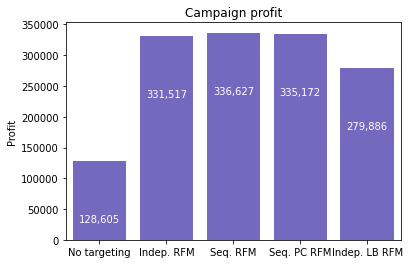

In [182]:

# insert code for the profit plot based on the 'plot_data' DataFrame
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
fig = sns.barplot(x="name", y="Profit", color="slateblue", data=plot_data)
fig.set(xlabel="", ylabel="Profit", title="Campaign profit")
for index, row in plot_data.iterrows():
    fig.text(
        row.name, row.Profit - 100000, f"{int(row.Profit):,}", ha="center", color="white"
    )

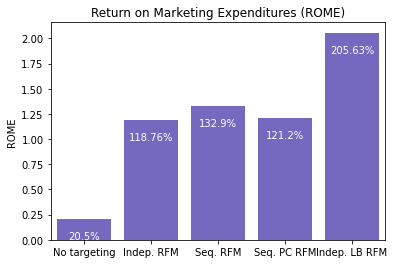

In [183]:
# insert code for the ROME plot based on the 'plot_data' DataFrame
plt.figure(figsize=(6, 4))
fig = sns.barplot(x="name", y="ROME", color="slateblue", data=plot_data)
fig.set(xlabel="", ylabel="ROME", title="Return on Marketing Expenditures (ROME)")
for index, row in plot_data.iterrows():
    fig.text(
        row.name,
        row.ROME - 0.2,
        f"{round((100*row.ROME), 2):,}%",
        ha="center",
        color="white",
    )

### Question 14

Make a copy of the current notebook `tuango-pre.ipynb` and name the copy `tuango-post.ipynb`. You also have access to a dataset with the results from the SMS roll-out (`tuango_post.pkl`). Tuango actually contacted all 250,902 customers. The data has a "training" variable (training = 1 for the data used in the test, training = 0 for the remaining customers). You can use this variable to help evaluate the actual performance for each of the different RFM approaches. Re-create the plot in question 13 based on this new dataset. 

Instead of using the `tuango_pre.pkl` data, use `tuango_post.pkl`. You should be able to re-use most of your code and text. Create a new function `perf_calc_actual` that calculates the actual performance for each targeting approach on the 'roll out' sample (i.e., training == 0). Also, keep your `perf_calc` and use it to check that this still calculates the same values you were seeing before based on the `tuango-pre.pkl` data. The `perf_calc_actual` function will be similar to `perf_calc` but you will need to make some changes to determine the actual outcomes. Also make sure to check that your `rfm_iq` variable is the same as `rfm_iq_pre` in the `tuango_post.pkl` dataset.

> Hint: It is important that you do NOT use any information about buyers that were in the 'roll out' sample (i.e., training == 0) when calculating the break-even response rate etc. for targeting. 

In [184]:
df1 = pd.read_pickle("data/tuango_pre.pkl")
df1.head()

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,training
0,U12617430,309,7,39.8,514,no,0.0,App,3,android,1
1,U63302737,297,8,39.8,514,no,0.0,Browser,3,android,1
2,U77095928,295,1,72.9,553,no,0.0,Browser,3,android,1
3,U43509181,277,1,40.0,554,no,0.0,Browser,3,android,1
4,U23195941,259,1,21.0,555,no,0.0,App,3,android,1


In [185]:
df2 = pd.read_pickle("data/tuango_post.pkl")
df2.head()

,userid,recency,frequency,monetary,rfm_iq_pre,buyer,ordersize,platform,category,mobile_os,training
0,U12617430,309,7,39.8,514,no,0.0,App,3,android,1.0
1,U63302737,297,8,39.8,514,no,0.0,Browser,3,android,1.0
2,U77095928,295,1,72.9,553,no,0.0,Browser,3,android,1.0
3,U43509181,277,1,40.0,554,no,0.0,Browser,3,android,1.0
4,U23195941,259,1,21.0,555,no,0.0,App,3,android,1.0
